# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

# Path to Images

## Directories

In [2]:
for dirname, _, filenames in os.walk('/Malaria/data'):
    print(dirname)

/Malaria/data
/Malaria/data\cell_images
/Malaria/data\cell_images\cell_images
/Malaria/data\cell_images\cell_images\Parasitized
/Malaria/data\cell_images\cell_images\Uninfected
/Malaria/data\Parasitized
/Malaria/data\Uninfected


## Files (Images) (Do Not Run)

In [3]:
# for filename in filenames:
#     print(os.path.join(dirname, filename))

# Data Preparation

In [4]:
def data_prep(parasitized,uninfected):
    
    parasitized= ["/Malaria/data/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["/Malaria/data/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})

In [5]:
df = data_prep(os.listdir("/Malaria/data/Parasitized/"), os.listdir("/Malaria/data/Uninfected/"))

In [6]:
df.head()

,Image_Path,Labels
0,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized
1,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized
2,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized
3,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized
4,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized


In [7]:
df.tail()

,Image_Path,Labels
27555,/Malaria/data/Uninfected/C99P60ThinF_IMG_20150...,uninfected
27556,/Malaria/data/Uninfected/C99P60ThinF_IMG_20150...,uninfected
27557,/Malaria/data/Uninfected/C99P60ThinF_IMG_20150...,uninfected
27558,/Malaria/data/Uninfected/C99P60ThinF_IMG_20150...,uninfected
27559,/Malaria/data/Uninfected/Thumbs.db,uninfected


In [8]:
df.describe()

,Image_Path,Labels
count,27560,27560
unique,27560,2
top,/Malaria/data/Parasitized/C100P61ThinF_IMG_201...,parasitized
freq,1,13780


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27560 entries, 0 to 27559
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  27560 non-null  object
 1   Labels      27560 non-null  object
dtypes: object(2)
memory usage: 430.8+ KB


# Displaying Images

## Parasitized

Displaying 5 Parasitized Images: 



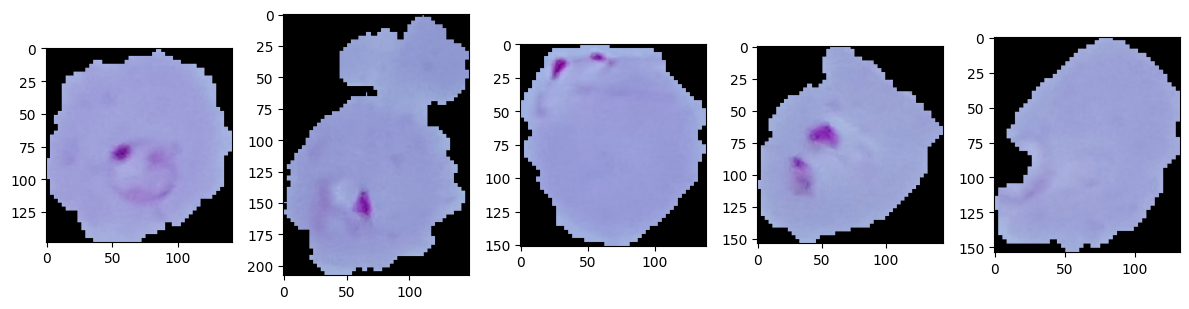

In [10]:
print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

## Uninfected


Displaying 5 Uninfected Images: 



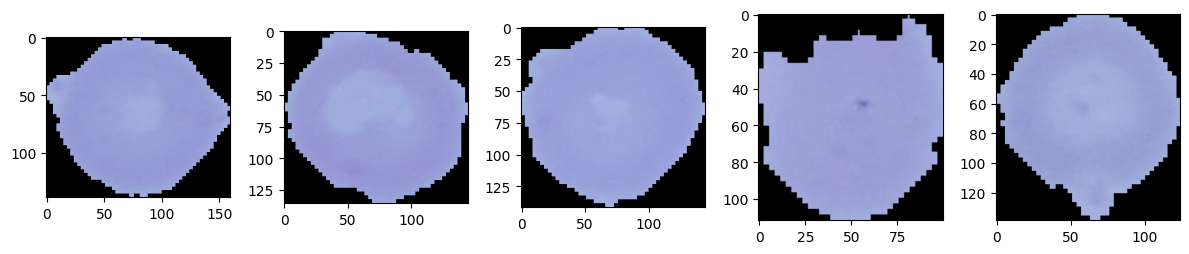

In [11]:
print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

# Distribution

Text(0.5, 1.0, 'Distribution of samples according to the categories')

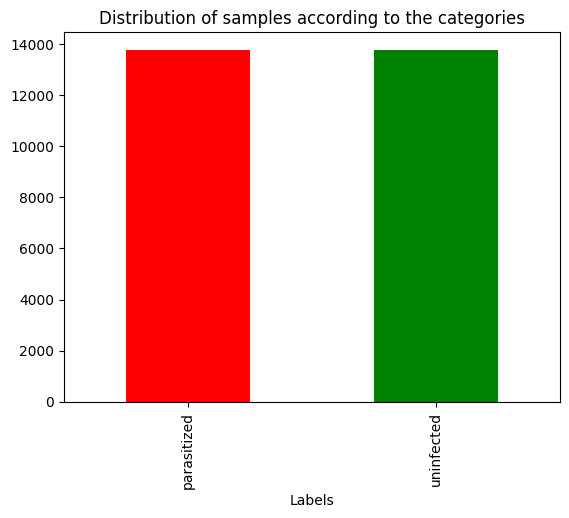

In [12]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# Data Augmentation